## Loading dependencies

In [72]:
import pandas as pd
import numpy as np
import wget
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [73]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [74]:
!pip3 install wget

## Loading the dataset

In [75]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = 'D:\Downloads\housing.csv'

wget.download(url, filename)

'D:\\Downloads\\housing (1).csv'

In [76]:
df = pd.read_csv('D:\Downloads\housing.csv')

## EDA

In [77]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


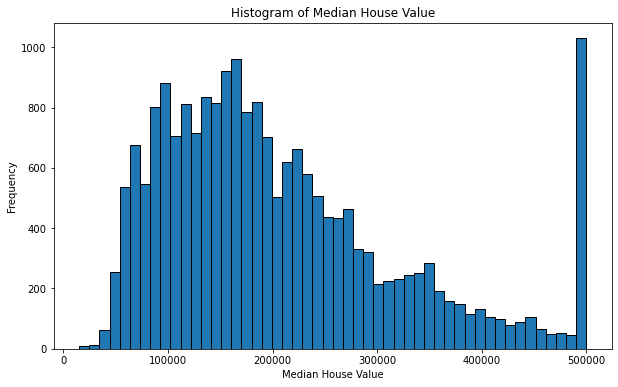

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(df['median_house_value'], bins=50, edgecolor='k')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Value')
plt.show()

In [79]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])].reset_index()
df = df[['latitude','longitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income','median_house_value']]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1

In [80]:
df.columns[df.isna().any()]

Index(['total_bedrooms'], dtype='object')

## Question 2

In [81]:
df.population.mean()

1466.3172053292535

## Question 3

In [82]:
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_df['median_house_value'] = np.log1p(train_df['median_house_value'])
val_df['median_house_value'] = np.log1p(val_df['median_house_value'])
test_df['median_house_value'] = np.log1p(test_df['median_house_value'])


In [83]:
# Option 1: Fill missing values with 0
train_df_fill_0 = train_df.fillna(0)
val_df_fill_0 = val_df.fillna(0)

# Assuming you have already split your features and target variable
X_train_fill_0 = train_df_fill_0.drop(columns=['median_house_value'])
y_train_fill_0 = train_df_fill_0['median_house_value']
X_val_fill_0 = val_df_fill_0.drop(columns=['median_house_value'])
y_val_fill_0 = val_df_fill_0['median_house_value']



lr_fill_0 = LinearRegression()
lr_fill_0.fit(X_train_fill_0, y_train_fill_0)
y_pred_fill_0 = lr_fill_0.predict(X_val_fill_0)

# Calculate RMSE for the model with missing values filled with 0
rmse_fill_0 = mean_squared_error(y_val_fill_0, y_pred_fill_0, squared=False)

In [84]:
# Option 2: Fill missing values with the mean of the training data
mean_train = train_df['total_bedrooms'].mean()
train_df_fill_mean = train_df.fillna({'total_bedrooms': mean_train})
val_df_fill_mean = val_df.fillna({'total_bedrooms': mean_train})

# Assuming you have already split your features and target variable
X_train_fill_mean = train_df_fill_mean.drop(columns=['median_house_value'])
y_train_fill_mean = train_df_fill_mean['median_house_value']
X_val_fill_mean = val_df_fill_mean.drop(columns=['median_house_value'])
y_val_fill_mean = val_df_fill_mean['median_house_value']

# Train a linear regression model without regularization
lr_fill_mean = LinearRegression()
lr_fill_mean.fit(X_train_fill_mean, y_train_fill_mean)
y_pred_fill_mean = lr_fill_mean.predict(X_val_fill_mean)

# Calculate RMSE for the model with missing values filled with the mean
rmse_fill_mean = mean_squared_error(y_val_fill_mean, y_pred_fill_mean, squared=False)


In [85]:
print("RMSE with missing values filled with 0:", round(rmse_fill_0, 2))
print("RMSE with missing values filled with mean:", round(rmse_fill_mean, 2))

if rmse_fill_0 < rmse_fill_mean:
    print("Filling missing values with 0 is better.")
else:
    print("Filling missing values with the mean is better.")


RMSE with missing values filled with 0: 0.35
RMSE with missing values filled with mean: 0.35
Filling missing values with the mean is better.


## Question 4

In [86]:
x_train_fill_0 = train_df_fill_0.drop(columns=['median_house_value'])
y_train_fill_0 = train_df_fill_0['median_house_value']
X_val_fill_0 = val_df_fill_0.drop(columns=['median_house_value'])
y_val_fill_0 = val_df_fill_0['median_house_value']

In [88]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(x_train_fill_0, y_train_fill_0)
    y_pred = model.predict(X_val_fill_0)
    current_rmse = np.sqrt(mean_squared_error(y_val_fill_0, y_pred))  # Calculate RMSE
    print(f"r = {r}: RMSE = {current_rmse:.4f}")

r = 0: RMSE = 0.3477
r = 1e-06: RMSE = 0.3477
r = 0.0001: RMSE = 0.3477
r = 0.001: RMSE = 0.3477
r = 0.01: RMSE = 0.3477
r = 0.1: RMSE = 0.3477
r = 1: RMSE = 0.3477
r = 5: RMSE = 0.3476
r = 10: RMSE = 0.3476


## Question 5

## Question 6